In [3]:
import numpy as np
import pandas as pd
import glob
import os
import time
import matplotlib as mpl
# from scipy import signal
from matplotlib import pyplot as plt
import D_XAS_Function_Definitions as D_XAS


%reload_ext autoreload
%autoreload 2

In [11]:
path = r'D:\UW Research\fr-XAS Feb 2018\Energy Spectrum_0.5Hz\Txt Files'
initfile=86
finfile=86

fa=0.5
decfac=1000
ROhm=27.5

filea=np.r_[initfile:finfile+1]
sttime=time.perf_counter()

for n in filea:
    filestr=str(path+'/E'+str(n)+'.txt')
    print(filestr)
    stloop=time.perf_counter()
    
    all_files=glob.glob(filestr)
    data=pd.read_csv(filestr,delimiter='\t', header=None,engine='python')
    data.columns=('Time','Io','If','J','V') #Io is incident X-ray, If is fluroesced X-ray
    data['Ir'] = data.If/data.Io
    print('Data read time:'+ str(time.perf_counter()-stloop))
#     if n==filea[0]:
#         dum1=D_XAS.fullanalyze(data, fa,decfac,PhsCor="EtaPhs",plotFFT=False,IRR=100,Rohm=ROhm)
#         print(time.perf_counter()-stloop)
# #         dum1=partanalyze(data,0.5,2000)
#     else:
#         dum1=np.concatenate((dum1,D_XAS.fullanalyze(data,fa,decfac,PhsCor="EtaPhs",IRR=100,Rohm=ROhm)),axis=0)
#         print(time.perf_counter()-stloop)
# #         dum1=dum1=np.concatenate((dum1,partanalyze(data,0.5,2000)),axis=0)

D:\UW Research\fr-XAS Feb 2018\Energy Spectrum_0.5Hz\Txt Files/E86.txt
Data read time:18.91971639999997


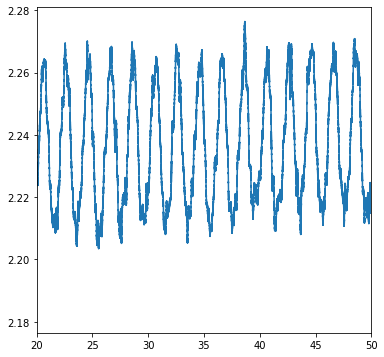

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax1.plot(data.Time, data.Ir)
ax1.set_xlim(20,50)
plt.show()

In [21]:
IRR = 100
datan = np.array([data.Time,D_XAS.submean(data.Ir),D_XAS.submean(data.J/IRR),
                   D_XAS.submean(data.V),D_XAS.submean(data.Io),D_XAS.submean(data.If)])

In [24]:
datfft, freq = D_XAS.getfft(datan[1:,:], datan[0,:])

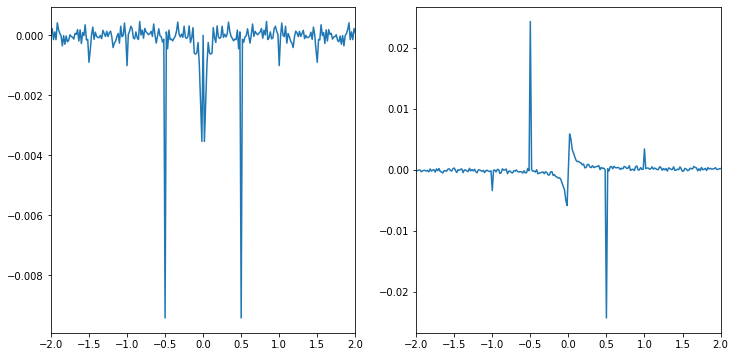

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(freq, datfft[0].real)
ax1.set_xlim(-2,2)

ax2.plot(freq, datfft[0].imag)
ax2.set_xlim(-2,2)
plt.show()

In [ ]:
np.fft.fftshift()